Build Simple Mushroom Classifier

In [1]:
from pathlib import Path
from fastai.vision.all import *

Load Images for 11 Taxa with 100 Images Each
Uncomment second line to use 100 Taxa with 100 Images Each

In [24]:
# MO_URL = "https://mushroomobserver.org/mo_11_100.tgz"
MO_URL = "https://images.mushroomobserver.org/mo_100_100.tgz"
path = untar_data(MO_URL)
fnames = get_image_files(path)
SYNONYMS = {
    'Clitocybe_nuda': 'Lepista_nuda',
    'Pluteus_cervinus': 'Pluteus_cervinus_group',
    'Amanita_amerirubescens': 'Amanita_amerirubescens_group',
    'Boletus_edulis': 'Boletus_edulis_group',
    'Coprinellus_micaceus': 'Coprinellus_sect._Micacei',
}

def label_func(x):
    dirname = x.parent.name
    return SYNONYMS.get(dirname, dirname)

dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
learn = vision_learner(dls, resnet34, metrics=error_rate)

Run Training

In [25]:
print(datetime.now())
learn.fine_tune(10)
print(datetime.now())

2022-07-20 08:22:50.339391


epoch,train_loss,valid_loss,error_rate,time
0,3.111685,1.324757,0.431818,01:25


epoch,train_loss,valid_loss,error_rate,time
0,1.449561,1.118151,0.327273,02:15
1,1.167069,0.860024,0.272727,02:11
2,0.881938,0.745695,0.218182,02:13
3,0.655847,0.746879,0.231818,02:10
4,0.494564,0.741897,0.213636,02:17
5,0.378017,0.711198,0.209091,02:07
6,0.290187,0.742679,0.227273,02:04
7,0.227667,0.731224,0.218182,02:03
8,0.178903,0.714851,0.213636,02:06
9,0.145470,0.724001,0.222727,02:05


2022-07-20 08:45:51.089016


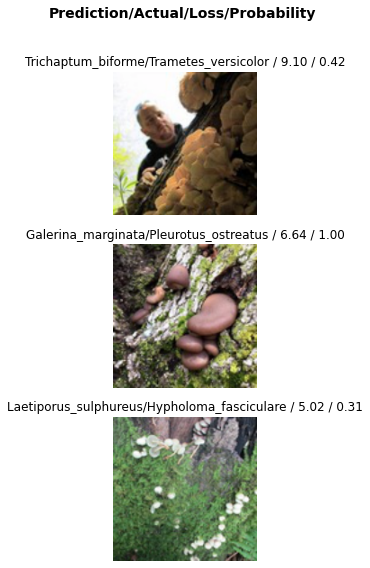

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

In [ ]:
interp.plot_top_losses(30, nrows=30)

Save the Model

In [28]:
# learn.save("sample-11x100-model")
learn.save("sample-100x100-model")

Path('/Users/nathan/.fastai/data/mo_11_100/models/sample-11x100-model.pth')

Reload and Verify the Model

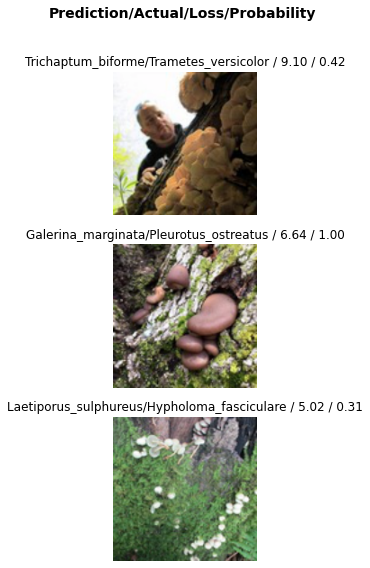

In [29]:
learn.load("sample-100x100-model")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(30, nrows=15)

In [26]:
# Copy saved movel to Google Drive so it can be saved and potentially downloaded and used elsewhere
from google.colab import drive
drive.mount('/content/drive')
!cp /root/.fastai/data/mo_100_100/models/sample-100x100-model.pth /content/drive/MyDrive

ModuleNotFoundError: No module named 'google'

In [32]:
import os

download_images("tmp", urls=["https://images.mushroomobserver.org/orig/1400576.jpg"])
os.listdir("tmp")
path = Path("tmp", os.listdir("tmp")[0])
learn.predict(path)

In [ ]:
SYNONYMS = [('Lepista_nuda', 'Clitocybe_nuda', 10),
 ('Pluteus_cervinus', 'Pluteus_cervinus_group', 8),
 ('Amanita_amerirubescens_group', 'Amanita_amerirubescens', 7),
 ('Boletus_edulis_group', 'Boletus_edulis', 7),
 ('Daedaleopsis_confragosa', 'Trametes_betulina', 7),
 ('Fomitopsis_pinicola', 'Fomitopsis_mounceae', 7),
 ('Amanita_amerirubescens', 'Amanita_amerirubescens_group', 6),
 ('Clitocybe_nuda', 'Lepista_nuda', 6),
 ('Coprinellus_micaceus', 'Coprinellus_sect._Micacei', 6),
 ('Amanita_brunnescens', 'Amanita_bisporigera', 5),
 ('Coprinellus_sect._Micacei', 'Coprinellus_micaceus', 5),
 ('Fomitopsis_mounceae', 'Fomitopsis_pinicola', 5),
 ('Laccaria_laccata', 'Tubaria_furfuracea', 5),
 ('Tremella_mesenterica', 'Dacrymyces_chrysospermus', 5),
 ('Amanita_flavorubens', 'Amanita_muscaria_var._guessowii', 4),
 ('Amanita_sect._Amanita', 'Amanita_sect._Lepidella', 4),
 ('Armillaria_mellea', 'Armillaria_tabescens', 4),
 ('Clitocybe_nuda', 'Laccaria_ochropurpurea', 4),
 ('Flammulina_velutipes', 'Galerina_marginata', 4),
 ('Stereum_hirsutum', 'Stereum_complicatum', 4),
 ('Trametes_betulina', 'Trametes_gibbosa', 4),
 ('Amanita_muscaria_var._guessowii', 'Amanita_flavorubens', 3),
 ('Amanita_sect._Amanita', 'Amanita_bisporigera', 3),
 ('Amanita_sect._Amanita', 'Amanita_brunnescens', 3),
 ('Amanita_sect._Amanita', 'Amanita_phalloides', 3),
 ('Amanita_sect._Phalloideae', 'Amanita_phalloides', 3),
 ('Chlorophyllum_molybdites', 'Agaricus_xanthodermus', 3),
 ('Clitocybe_nuda', 'Cortinarius_subg._Telamonia', 3),
 ('Cortinarius_subg._Telamonia', 'Tubaria_furfuracea', 3),
 ('Dacrymyces_chrysospermus', 'Tremella_mesenterica', 3),
 ('Daedaleopsis_confragosa', 'Trametes_gibbosa', 3),
 ('Hypholoma_fasciculare', 'Hypholoma_capnoides', 3),
 ('Hypholoma_fasciculare', 'Hypholoma_lateritium', 3),
 ('Pleurotus_ostreatus', 'Pleurotus_pulmonarius', 3),
 ('Pleurotus_pulmonarius', 'Pleurotus_ostreatus', 3),
 ('Psilocybe_ovoideocystidiata', 'Stropharia_ambigua', 3),
 ('Stereum_hirsutum', 'Phlebia_tremellosa', 3),
 ('Stereum_ostrea', 'Stereum_hirsutum', 3),
 ('Trametes_betulina', 'Ganoderma_applanatum', 3),
 ('Trametes_gibbosa', 'Trametes_betulina', 3),
 ('Agaricus_xanthodermus', 'Chlorophyllum_molybdites', 2),
 ('Agaricus_xanthodermus', 'Leucoagaricus_leucothites', 2),
 ('Amanita_amerirubescens', 'Amanita_flavorubens', 2),
 ('Amanita_flavoconia', 'Hygrocybe_flavescens', 2),
 ('Amanita_flavorubens', 'Amanita_amerirubescens_group', 2),
 ('Amanita_flavorubens', 'Amanita_flavoconia', 2),
 ('Amanita_muscaria_subsp._flavivolvata',
  'Amanita_muscaria_var._guessowii',
  2),
 ('Amanita_phalloides', 'Agaricus_xanthodermus', 2),
 ('Amanita_sect._Amanita', 'Amanita_flavorubens', 2),
 ('Boletus_edulis', 'Boletus_edulis_group', 2),
 ('Ceratiomyxa_fruticulosa', 'Fuligo_septica', 2),
 ('Coprinus_comatus', 'Amanita_phalloides', 2),
 ('Dacrymyces_chrysospermus', 'Fomitopsis_pinicola', 2),
 ('Dacrymyces_chrysospermus', 'Fuligo_septica', 2),
 ('Daedaleopsis_confragosa', 'Ganoderma_applanatum', 2),
 ('Entoloma_abortivum', 'Agaricus_xanthodermus', 2),
 ('Flammulina_velutipes', 'Hypomyces_lactifluorum', 2),
 ('Flammulina_velutipes', 'Mycena_leaiana', 2),
 ('Galerina_marginata', 'Psilocybe_cyanescens', 2),
 ('Galerina_marginata', 'Tubaria_furfuracea', 2),
 ('Ganoderma_applanatum', 'Trametes_gibbosa', 2),
 ('Gymnopus_dryophilus', 'Tubaria_furfuracea', 2),
 ('Hericium_erinaceus', 'Fomitopsis_pinicola', 2),
 ('Hypholoma_capnoides', 'Coprinellus_sect._Micacei', 2),
 ('Hypholoma_capnoides', 'Hypholoma_fasciculare', 2),
 ('Hypholoma_capnoides', 'Stropharia_ambigua', 2),
 ('Hypholoma_fasciculare', 'Sarcomyxa_serotina', 2),
 ('Hypholoma_lateritium', 'Hypholoma_capnoides', 2),
 ('Hypholoma_lateritium', 'Hypholoma_fasciculare', 2),
 ('Hypholoma_lateritium', 'Ischnoderma_resinosum', 2),
 ('Hypomyces_chrysospermus', 'Fuligo_septica', 2),
 ('Lepista_nuda', 'Agaricus_xanthodermus', 2),
 ('Leucoagaricus_leucothites', 'Entoloma_abortivum', 2),
 ('Lycogala_epidendrum', 'Lycoperdon_pyriforme', 2),
 ('Lycoperdon_perlatum', 'Scleroderma_citrinum', 2),
 ('Lycoperdon_pyriforme', 'Lycogala_epidendrum', 2),
 ('Lycoperdon_pyriforme', 'Scleroderma_citrinum', 2),
 ('Mycena_leaiana', 'Flammulina_velutipes', 2),
 ('Omphalotus_illudens', 'Armillaria_tabescens', 2),
 ('Omphalotus_illudens', 'Mycena_leaiana', 2),
 ('Panaeolus_foenisecii', 'Agrocybe_pediades', 2),
 ('Pleurotus_ostreatus', 'Sarcomyxa_serotina', 2),
 ('Pluteus_cervinus', 'Amanita_brunnescens', 2),
 ('Pluteus_cervinus_group', 'Pluteus_cervinus', 2),
 ('Psilocybe_cubensis', 'Coprinellus_disseminatus', 2),
 ('Psilocybe_cubensis', 'Coprinellus_micaceus', 2),
 ('Psilocybe_cyanescens', 'Leratiomyces_ceres', 2),
 ('Psilocybe_cyanescens', 'Tubaria_furfuracea', 2),
 ('Psilocybe_ovoideocystidiata', 'Cortinarius_subg._Telamonia', 2),
 ('Psilocybe_ovoideocystidiata', 'Pluteus_cervinus_group', 2),
 ('Psilocybe_ovoideocystidiata', 'Psilocybe_cyanescens', 2),
 ('Sarcomyxa_serotina', 'Ischnoderma_resinosum', 2),
 ('Schizophyllum_commune', 'Artomyces_pyxidatus', 2),
 ('Scleroderma_citrinum', 'Cerioporus_squamosus', 2),
 ('Stereum_hirsutum', 'Gloeophyllum_sepiarium', 2),
 ('Stereum_hirsutum', 'Phyllotopsis_nidulans', 2),
 ('Stereum_ostrea', 'Trametes_versicolor', 2),
 ('Suillus_americanus', 'Boletus_edulis_group', 2),
 ('Suillus_americanus', 'Hygrocybe_flavescens', 2),
 ('Trametes_betulina', 'Daedaleopsis_confragosa', 2),
 ('Trichaptum_biforme', 'Coprinellus_disseminatus', 2),
 ('Trichaptum_biforme', 'Stereum_ostrea', 2),
 ('Tubaria_furfuracea', 'Agrocybe_pediades', 2),
 ('Tubaria_furfuracea', 'Psilocybe_cyanescens', 2),
 ('Tylopilus_felleus', 'Boletus_edulis', 2),
 ('Tylopilus_rubrobrunneus', 'Tylopilus_felleus', 2),
 ('Agaricus_xanthodermus', 'Amanita_brunnescens', 1),
 ('Agaricus_xanthodermus', 'Boletus_edulis_group', 1),
 ('Agaricus_xanthodermus', 'Daedaleopsis_confragosa', 1),
 ('Agaricus_xanthodermus', 'Gymnopus_dryophilus', 1),
 ('Agaricus_xanthodermus', 'Hypomyces_chrysospermus', 1),
 ('Agaricus_xanthodermus', 'Lycoperdon_perlatum', 1),
 ('Agaricus_xanthodermus', 'Psilocybe_ovoideocystidiata', 1),
 ('Agrocybe_pediades', 'Gymnopus_dryophilus', 1),
 ('Agrocybe_pediades', 'Lacrymaria_lacrymabunda', 1),
 ('Agrocybe_pediades', 'Panellus_stipticus', 1),
 ('Agrocybe_pediades', 'Psilocybe_cubensis', 1),
 ('Amanita_amerirubescens', 'Amanita_bisporigera', 1),
 ('Amanita_amerirubescens', 'Amanita_sect._Lepidella', 1),
 ('Amanita_amerirubescens', 'Cerioporus_squamosus', 1),
 ('Amanita_amerirubescens', 'Leucoagaricus_leucothites', 1),
 ('Amanita_amerirubescens', 'Phlebia_tremellosa', 1),
 ('Amanita_amerirubescens_group', 'Amanita_brunnescens', 1),
 ('Amanita_amerirubescens_group', 'Amanita_muscaria_subsp._flavivolvata', 1),
 ('Amanita_amerirubescens_group', 'Amanita_sect._Amanita', 1),
 ('Amanita_amerirubescens_group', 'Ganoderma_applanatum', 1),
 ('Amanita_bisporigera', 'Amanita_brunnescens', 1),
 ('Amanita_bisporigera', 'Amanita_sect._Phalloideae', 1),
 ('Amanita_bisporigera', 'Pseudohydnum_gelatinosum', 1),
 ('Amanita_brunnescens', 'Amanita_phalloides', 1),
 ('Amanita_brunnescens', 'Amanita_sect._Amanita', 1),
 ('Amanita_brunnescens', 'Amanita_sect._Lepidella', 1),
 ('Amanita_brunnescens', 'Pluteus_cervinus', 1),
 ('Amanita_flavoconia', 'Amanita_flavorubens', 1),
 ('Amanita_flavoconia', 'Bolbitius_titubans', 1),
 ('Amanita_flavoconia', 'Gymnopus_dryophilus', 1),
 ('Amanita_flavoconia', 'Suillus_americanus', 1),
 ('Amanita_flavorubens', 'Amanita_phalloides', 1),
 ('Amanita_flavorubens', 'Fuligo_septica', 1),
 ('Amanita_flavorubens', 'Hypomyces_chrysospermus', 1),
 ('Amanita_muscaria_subsp._flavivolvata', 'Leratiomyces_ceres', 1),
 ('Amanita_muscaria_var._guessowii',
  'Amanita_muscaria_subsp._flavivolvata',
  1),
 ('Amanita_muscaria_var._guessowii', 'Amanita_sect._Lepidella', 1),
 ('Amanita_muscaria_var._guessowii', 'Lycoperdon_perlatum', 1),
 ('Amanita_phalloides', 'Amanita_brunnescens', 1),
 ('Amanita_phalloides', 'Amanita_sect._Amanita', 1),
 ('Amanita_sect._Amanita', 'Amanita_amerirubescens_group', 1),
 ('Amanita_sect._Amanita', 'Bolbitius_titubans', 1),
 ('Amanita_sect._Amanita', 'Boletus_edulis', 1),
 ('Amanita_sect._Amanita', 'Daedaleopsis_confragosa', 1),
 ('Amanita_sect._Amanita', 'Ganoderma_applanatum', 1),
 ('Amanita_sect._Amanita', 'Leucoagaricus_leucothites', 1),
 ('Amanita_sect._Amanita', 'Stereum_hirsutum', 1),
 ('Amanita_sect._Amanita', 'Stropharia_ambigua', 1),
 ('Amanita_sect._Lepidella', 'Amanita_amerirubescens_group', 1),
 ('Amanita_sect._Lepidella', 'Amanita_bisporigera', 1),
 ('Amanita_sect._Lepidella', 'Amanita_sect._Amanita', 1),
 ('Amanita_sect._Lepidella', 'Amanita_sect._Phalloideae', 1),
 ('Amanita_sect._Lepidella', 'Amanita_sect._Vaginatae', 1),
 ('Amanita_sect._Lepidella', 'Chlorophyllum_molybdites', 1),
 ('Amanita_sect._Lepidella', 'Hypomyces_chrysospermus', 1),
 ('Amanita_sect._Lepidella', 'Leucoagaricus_leucothites', 1),
 ('Amanita_sect._Lepidella', 'Pseudohydnum_gelatinosum', 1),
 ('Amanita_sect._Lepidella', 'Trametes_betulina', 1),
 ('Amanita_sect._Phalloideae', 'Agaricus_xanthodermus', 1),
 ('Amanita_sect._Phalloideae', 'Amanita_bisporigera', 1),
 ('Amanita_sect._Phalloideae', 'Amanita_brunnescens', 1),
 ('Amanita_sect._Phalloideae', 'Amanita_sect._Amanita', 1),
 ('Amanita_sect._Phalloideae', 'Chlorophyllum_molybdites', 1),
 ('Amanita_sect._Phalloideae', 'Entoloma_abortivum', 1),
 ('Amanita_sect._Phalloideae', 'Megacollybia_rodmanii', 1),
 ('Amanita_sect._Vaginatae', 'Amanita_muscaria_subsp._flavivolvata', 1),
 ('Armillaria_mellea', 'Amanita_flavorubens', 1),
 ('Armillaria_mellea', 'Amanita_muscaria_var._guessowii', 1),
 ('Armillaria_mellea', 'Boletus_edulis', 1),
 ('Armillaria_mellea', 'Hygrocybe_flavescens', 1),
 ('Armillaria_mellea', 'Hypholoma_fasciculare', 1),
 ('Armillaria_mellea', 'Leotia_lubrica', 1),
 ('Armillaria_mellea', 'Retiboletus_ornatipes', 1),
 ('Armillaria_mellea', 'Sarcomyxa_serotina', 1),
 ('Armillaria_mellea', 'Stropharia_ambigua', 1),
 ('Armillaria_tabescens', 'Armillaria_mellea', 1),
 ('Armillaria_tabescens', 'Cortinarius_subg._Telamonia', 1),
 ('Armillaria_tabescens', 'Fuligo_septica', 1),
 ('Armillaria_tabescens', 'Hypholoma_lateritium', 1),
 ('Armillaria_tabescens', 'Pleurotus_ostreatus', 1),
 ('Armillaria_tabescens', 'Pluteus_cervinus_group', 1),
 ('Artomyces_pyxidatus', 'Hypholoma_lateritium', 1),
 ('Bolbitius_titubans', 'Amanita_flavorubens', 1),
 ('Bolbitius_titubans', 'Amanita_phalloides', 1),
 ('Bolbitius_titubans', 'Laccaria_laccata', 1),
 ('Bolbitius_titubans', 'Retiboletus_ornatipes', 1),
 ('Boletus_edulis', 'Amanita_amerirubescens', 1),
 ('Boletus_edulis', 'Amanita_phalloides', 1),
 ('Boletus_edulis', 'Fomitopsis_pinicola', 1),
 ('Boletus_edulis', 'Gloeophyllum_sepiarium', 1),
 ('Boletus_edulis', 'Lepista_nuda', 1),
 ('Boletus_edulis', 'Retiboletus_ornatipes', 1),
 ('Boletus_edulis', 'Tapinella_atrotomentosa', 1),
 ('Boletus_edulis', 'Tylopilus_felleus', 1),
 ('Boletus_edulis_group', 'Cortinarius_subg._Telamonia', 1),
 ('Boletus_edulis_group', 'Fomitopsis_pinicola', 1),
 ('Boletus_edulis_group', 'Fuligo_septica', 1),
 ('Boletus_edulis_group', 'Stropharia_ambigua', 1),
 ('Boletus_edulis_group', 'Tylopilus_felleus', 1),
 ('Cantharellus_cinnabarinus', 'Hypomyces_lactifluorum', 1),
 ('Cantharellus_cinnabarinus', 'Panaeolus_foenisecii', 1),
 ('Ceratiomyxa_fruticulosa', 'Phlebia_tremellosa', 1),
 ('Ceratiomyxa_fruticulosa', 'Psilocybe_ovoideocystidiata', 1),
 ('Cerioporus_squamosus', 'Amanita_muscaria_var._guessowii', 1),
 ('Cerioporus_squamosus', 'Ganoderma_applanatum', 1),
 ('Cerioporus_squamosus', 'Gloeophyllum_sepiarium', 1),
 ('Cerioporus_squamosus', 'Pluteus_cervinus_group', 1),
 ('Cerioporus_squamosus', 'Psilocybe_cubensis', 1),
 ('Cerioporus_squamosus', 'Scleroderma_citrinum', 1),
 ('Cerioporus_squamosus', 'Trametes_betulina', 1),
 ('Chlorophyllum_molybdites', 'Amanita_sect._Lepidella', 1),
 ('Chlorophyllum_molybdites', 'Coprinus_comatus', 1),
 ('Chlorophyllum_molybdites', 'Daedaleopsis_confragosa', 1),
 ('Chlorophyllum_molybdites', 'Leratiomyces_ceres', 1),
 ('Chlorophyllum_molybdites', 'Leucoagaricus_leucothites', 1),
 ('Chlorophyllum_molybdites', 'Lycoperdon_perlatum', 1),
 ('Clitocybe_nuda', 'Gymnopus_dryophilus', 1),
 ('Clitocybe_nuda', 'Stropharia_ambigua', 1),
 ('Coprinellus_disseminatus', 'Amanita_phalloides', 1),
 ('Coprinellus_disseminatus', 'Bolbitius_titubans', 1),
 ('Coprinellus_disseminatus', 'Coprinellus_sect._Micacei', 1),
 ('Coprinellus_disseminatus', 'Craterellus_fallax', 1),
 ('Coprinellus_disseminatus', 'Lycoperdon_perlatum', 1),
 ('Coprinellus_disseminatus', 'Panellus_stipticus', 1),
 ('Coprinellus_disseminatus', 'Stereum_hirsutum', 1),
 ('Coprinellus_micaceus', 'Mycena_haematopus', 1),
 ('Coprinellus_sect._Micacei', 'Bolbitius_titubans', 1),
 ('Coprinellus_sect._Micacei', 'Hypholoma_fasciculare', 1),
 ('Coprinellus_sect._Micacei', 'Lacrymaria_lacrymabunda', 1),
 ('Coprinellus_sect._Micacei', 'Stereum_hirsutum', 1),
 ('Coprinus_comatus', 'Amanita_sect._Lepidella', 1),
 ('Coprinus_comatus', 'Leucoagaricus_leucothites', 1),
 ('Coprinus_comatus', 'Panellus_stipticus', 1),
 ('Cortinarius_subg._Telamonia', 'Agaricus_xanthodermus', 1),
 ('Cortinarius_subg._Telamonia', 'Gymnopus_dryophilus', 1),
 ('Cortinarius_subg._Telamonia', 'Hypomyces_lactifluorum', 1),
 ('Cortinarius_subg._Telamonia', 'Ischnoderma_resinosum', 1),
 ('Cortinarius_subg._Telamonia', 'Laccaria_laccata', 1),
 ('Craterellus_fallax', 'Phaeolus_schweinitzii', 1),
 ('Craterellus_fallax', 'Pseudohydnum_gelatinosum', 1),
 ('Craterellus_fallax', 'Psilocybe_cyanescens', 1),
 ('Craterellus_fallax', 'Scleroderma_citrinum', 1),
 ('Dacrymyces_chrysospermus', 'Coprinellus_micaceus', 1),
 ('Dacrymyces_chrysospermus', 'Omphalotus_illudens', 1),
 ('Daedaleopsis_confragosa', 'Amanita_sect._Lepidella', 1),
 ('Daedaleopsis_confragosa', 'Hericium_erinaceus', 1),
 ('Daedaleopsis_confragosa', 'Pluteus_cervinus_group', 1),
 ('Daedaleopsis_confragosa', 'Tylopilus_felleus', 1),
 ('Entoloma_abortivum', 'Amanita_sect._Amanita', 1),
 ('Entoloma_abortivum', 'Armillaria_mellea', 1),
 ('Entoloma_abortivum', 'Hypomyces_chrysospermus', 1),
 ('Entoloma_abortivum', 'Lepista_nuda', 1),
 ('Entoloma_abortivum', 'Megacollybia_rodmanii', 1),
 ('Entoloma_abortivum', 'Tylopilus_felleus', 1),
 ('Flammulina_velutipes', 'Gloeophyllum_sepiarium', 1),
 ('Flammulina_velutipes', 'Gymnopus_dryophilus', 1),
 ('Flammulina_velutipes', 'Leratiomyces_ceres', 1),
 ('Flammulina_velutipes', 'Lycogala_epidendrum', 1),
 ('Flammulina_velutipes', 'Psilocybe_cubensis', 1),
 ('Fomitopsis_mounceae', 'Gloeophyllum_sepiarium', 1),
 ('Fomitopsis_mounceae', 'Ischnoderma_resinosum', 1),
 ('Fomitopsis_pinicola', 'Amanita_amerirubescens', 1),
 ('Fomitopsis_pinicola', 'Amanita_sect._Lepidella', 1),
 ('Fomitopsis_pinicola', 'Ganoderma_applanatum', 1),
 ('Fomitopsis_pinicola', 'Laccaria_ochropurpurea', 1),
 ('Fuligo_septica', 'Cerioporus_squamosus', 1),
 ('Fuligo_septica', 'Clitocybe_nuda', 1),
 ('Fuligo_septica', 'Leotia_lubrica', 1),
 ('Fuligo_septica', 'Schizophyllum_commune', 1),
 ('Fuligo_septica', 'Tylopilus_felleus', 1),
 ('Galerina_marginata', 'Bolbitius_titubans', 1),
 ('Galerina_marginata', 'Cortinarius_subg._Telamonia', 1),
 ('Galerina_marginata', 'Flammulina_velutipes', 1),
 ('Ganoderma_applanatum', 'Agaricus_xanthodermus', 1),
 ('Ganoderma_applanatum', 'Boletus_edulis', 1),
 ('Ganoderma_applanatum', 'Cerioporus_squamosus', 1),
 ('Ganoderma_applanatum', 'Entoloma_abortivum', 1),
 ('Ganoderma_applanatum', 'Fomitopsis_mounceae', 1),
 ('Ganoderma_applanatum', 'Ischnoderma_resinosum', 1),
 ('Ganoderma_applanatum', 'Pseudohydnum_gelatinosum', 1),
 ('Ganoderma_applanatum', 'Stereum_ostrea', 1),
 ('Gloeophyllum_sepiarium', 'Daedaleopsis_confragosa', 1),
 ('Gloeophyllum_sepiarium', 'Fomitopsis_mounceae', 1),
 ('Gloeophyllum_sepiarium', 'Fomitopsis_pinicola', 1),
 ('Gloeophyllum_sepiarium', 'Fuligo_septica', 1),
 ('Gloeophyllum_sepiarium', 'Stereum_complicatum', 1),
 ('Gloeophyllum_sepiarium', 'Trametes_versicolor', 1),
 ('Grifola_frondosa', 'Agaricus_xanthodermus', 1),
 ('Grifola_frondosa', 'Amanita_sect._Amanita', 1),
 ('Grifola_frondosa', 'Cortinarius_subg._Telamonia', 1),
 ('Grifola_frondosa', 'Ischnoderma_resinosum', 1),
 ('Grifola_frondosa', 'Stereum_complicatum', 1),
 ('Gymnopus_dryophilus', 'Galerina_marginata', 1),
 ('Gymnopus_dryophilus', 'Leucoagaricus_leucothites', 1),
 ('Gymnopus_dryophilus', 'Lycogala_epidendrum', 1),
 ('Gymnopus_dryophilus', 'Pluteus_cervinus_group', 1),
 ('Gymnopus_dryophilus', 'Stropharia_ambigua', 1),
 ('Gymnopus_dryophilus', 'Trichaptum_biforme', 1),
 ('Hericium_erinaceus', 'Armillaria_mellea', 1),
 ('Hericium_erinaceus', 'Coprinellus_sect._Micacei', 1),
 ('Hericium_erinaceus', 'Fuligo_septica', 1),
 ('Hericium_erinaceus', 'Phlebia_tremellosa', 1),
 ('Hygrocybe_flavescens', 'Amanita_flavoconia', 1),
 ('Hygrocybe_flavescens', 'Amanita_flavorubens', 1),
 ('Hygrocybe_flavescens', 'Lycoperdon_perlatum', 1),
 ('Hygrocybe_flavescens', 'Psilocybe_cyanescens', 1),
 ('Hygrocybe_flavescens', 'Tylopilus_felleus', 1),
 ('Hygrophoropsis_aurantiaca', 'Laccaria_laccata', 1),
 ('Hypholoma_capnoides', 'Agaricus_xanthodermus', 1),
 ('Hypholoma_capnoides', 'Flammulina_velutipes', 1),
 ('Hypholoma_capnoides', 'Hypholoma_lateritium', 1),
 ('Hypholoma_capnoides', 'Lacrymaria_lacrymabunda', 1),
 ('Hypholoma_capnoides', 'Pluteus_cervinus_group', 1),
 ('Hypholoma_fasciculare', 'Amanita_phalloides', 1),
 ('Hypholoma_fasciculare', 'Panellus_stipticus', 1),
 ('Hypholoma_fasciculare', 'Pleurotus_pulmonarius', 1),
 ('Hypholoma_lateritium', 'Hypomyces_chrysospermus', 1),
 ('Hypomyces_chrysospermus', 'Amanita_phalloides', 1),
 ('Hypomyces_chrysospermus', 'Bolbitius_titubans', 1),
 ('Hypomyces_chrysospermus', 'Daedaleopsis_confragosa', 1),
 ('Hypomyces_chrysospermus', 'Hericium_erinaceus', 1),
 ('Hypomyces_chrysospermus', 'Retiboletus_ornatipes', 1),
 ('Hypomyces_chrysospermus', 'Stereum_complicatum', 1),
 ('Hypomyces_chrysospermus', 'Tylopilus_felleus', 1),
 ('Hypomyces_lactifluorum', 'Cantharellus_cinnabarinus', 1),
 ('Hypomyces_lactifluorum', 'Leratiomyces_ceres', 1),
 ('Ischnoderma_resinosum', 'Fomitopsis_pinicola', 1),
 ('Ischnoderma_resinosum', 'Panellus_stipticus', 1),
 ('Ischnoderma_resinosum', 'Pleurotus_ostreatus', 1),
 ('Laccaria_laccata', 'Cantharellus_cinnabarinus', 1),
 ('Laccaria_laccata', 'Cerioporus_squamosus', 1),
 ('Laccaria_laccata', 'Cortinarius_subg._Telamonia', 1),
 ('Laccaria_laccata', 'Galerina_marginata', 1),
 ('Laccaria_laccata', 'Lacrymaria_lacrymabunda', 1),
 ('Laccaria_laccata', 'Leratiomyces_ceres', 1),
 ('Laccaria_laccata', 'Panaeolus_foenisecii', 1),
 ('Laccaria_laccata', 'Panellus_stipticus', 1),
 ('Laccaria_laccata', 'Pluteus_cervinus', 1),
 ('Laccaria_laccata', 'Scleroderma_citrinum', 1),
 ('Laccaria_ochropurpurea', 'Amanita_sect._Lepidella', 1),
 ('Laccaria_ochropurpurea', 'Entoloma_abortivum', 1),
 ('Laccaria_ochropurpurea', 'Galerina_marginata', 1),
 ('Laccaria_ochropurpurea', 'Ganoderma_applanatum', 1),
 ('Laccaria_ochropurpurea', 'Lepista_nuda', 1),
 ('Laccaria_ochropurpurea', 'Trichaptum_biforme', 1),
 ('Lacrymaria_lacrymabunda', 'Coprinellus_micaceus', 1),
 ('Lacrymaria_lacrymabunda', 'Cortinarius_subg._Telamonia', 1),
 ('Lacrymaria_lacrymabunda', 'Panaeolus_foenisecii', 1),
 ('Lacrymaria_lacrymabunda', 'Scleroderma_citrinum', 1),
 ('Laetiporus_sulphureus', 'Gloeophyllum_sepiarium', 1),
 ('Laetiporus_sulphureus', 'Ischnoderma_resinosum', 1),
 ('Leotia_lubrica', 'Amanita_flavoconia', 1),
 ('Leotia_lubrica', 'Craterellus_fallax', 1),
 ('Leotia_lubrica', 'Fuligo_septica', 1),
 ('Leotia_lubrica', 'Hypomyces_chrysospermus', 1),
 ('Leotia_lubrica', 'Lacrymaria_lacrymabunda', 1),
 ('Leotia_lubrica', 'Retiboletus_ornatipes', 1),
 ('Lepista_nuda', 'Amanita_sect._Amanita', 1),
 ('Lepista_nuda', 'Entoloma_abortivum', 1),
 ('Lepista_nuda', 'Pleurotus_ostreatus', 1),
 ('Lepista_nuda', 'Pseudohydnum_gelatinosum', 1),
 ('Lepista_nuda', 'Tubaria_furfuracea', 1),
 ('Leratiomyces_ceres', 'Hypholoma_lateritium', 1),
 ('Leratiomyces_ceres', 'Lacrymaria_lacrymabunda', 1),
 ('Leratiomyces_ceres', 'Stereum_ostrea', 1),
 ('Leucoagaricus_leucothites', 'Amanita_sect._Vaginatae', 1),
 ('Leucoagaricus_leucothites', 'Boletus_edulis_group', 1),
 ('Leucoagaricus_leucothites', 'Chlorophyllum_molybdites', 1),
 ('Leucoagaricus_leucothites', 'Hypholoma_fasciculare', 1),
 ('Leucoagaricus_leucothites', 'Hypomyces_chrysospermus', 1),
 ('Leucoagaricus_leucothites', 'Lycoperdon_perlatum', 1),
 ('Leucoagaricus_leucothites', 'Megacollybia_rodmanii', 1),
 ('Leucoagaricus_leucothites', 'Pseudohydnum_gelatinosum', 1),
 ('Lycogala_epidendrum', 'Leratiomyces_ceres', 1),
 ('Lycogala_epidendrum', 'Mycena_haematopus', 1),
 ('Lycogala_epidendrum', 'Sarcomyxa_serotina', 1),
 ('Lycoperdon_perlatum', 'Agaricus_xanthodermus', 1),
 ('Lycoperdon_perlatum', 'Amanita_sect._Lepidella', 1),
 ('Lycoperdon_pyriforme', 'Coprinellus_disseminatus', 1),
 ('Lycoperdon_pyriforme', 'Coprinellus_sect._Micacei', 1),
 ('Lycoperdon_pyriforme', 'Lycoperdon_perlatum', 1),
 ('Lycoperdon_pyriforme', 'Psilocybe_cubensis', 1),
 ('Megacollybia_rodmanii', 'Amanita_brunnescens', 1),
 ('Megacollybia_rodmanii', 'Amanita_sect._Vaginatae', 1),
 ('Megacollybia_rodmanii', 'Hericium_erinaceus', 1),
 ('Megacollybia_rodmanii', 'Pluteus_cervinus', 1),
 ('Megacollybia_rodmanii', 'Pluteus_cervinus_group', 1),
 ('Megacollybia_rodmanii', 'Retiboletus_ornatipes', 1),
 ('Megacollybia_rodmanii', 'Tylopilus_felleus', 1),
 ('Mycena_haematopus', 'Hypholoma_lateritium', 1),
 ('Mycena_haematopus', 'Ischnoderma_resinosum', 1),
 ('Mycena_leaiana', 'Dacrymyces_chrysospermus', 1),
 ('Mycena_leaiana', 'Galerina_marginata', 1),
 ('Mycena_leaiana', 'Gloeophyllum_sepiarium', 1),
 ('Mycena_leaiana', 'Omphalotus_illudens', 1),
 ('Mycena_leaiana', 'Tremella_mesenterica', 1),
 ('Omphalotus_illudens', 'Amanita_muscaria_var._guessowii', 1),
 ('Omphalotus_illudens', 'Armillaria_mellea', 1),
 ('Omphalotus_illudens', 'Cantharellus_cinnabarinus', 1),
 ('Omphalotus_illudens', 'Flammulina_velutipes', 1),
 ('Omphalotus_illudens', 'Panellus_stipticus', 1),
 ('Panaeolus_foenisecii', 'Psilocybe_cubensis', 1),
 ('Panaeolus_foenisecii', 'Psilocybe_ovoideocystidiata', 1),
 ('Panellus_stipticus', 'Artomyces_pyxidatus', 1),
 ('Panellus_stipticus', 'Cerioporus_squamosus', 1),
 ('Panellus_stipticus', 'Coprinellus_disseminatus', 1),
 ('Panellus_stipticus', 'Pleurotus_pulmonarius', 1),
 ('Panellus_stipticus', 'Schizophyllum_commune', 1),
 ('Phaeolus_schweinitzii', 'Amanita_sect._Lepidella', 1),
 ('Phaeolus_schweinitzii', 'Trametes_versicolor', 1),
 ('Phlebia_tremellosa', 'Ceratiomyxa_fruticulosa', 1),
 ('Phlebia_tremellosa', 'Phaeolus_schweinitzii', 1),
 ('Phlebia_tremellosa', 'Schizophyllum_commune', 1),
 ('Phyllotopsis_nidulans', 'Armillaria_mellea', 1),
 ('Phyllotopsis_nidulans', 'Laetiporus_sulphureus', 1),
 ('Phyllotopsis_nidulans', 'Phlebia_tremellosa', 1),
 ('Phyllotopsis_nidulans', 'Pleurotus_ostreatus', 1),
 ('Pleurotus_ostreatus', 'Coprinellus_disseminatus', 1),
 ('Pleurotus_ostreatus', 'Entoloma_abortivum', 1),
 ('Pleurotus_ostreatus', 'Leucoagaricus_leucothites', 1),
 ('Pleurotus_ostreatus', 'Lycoperdon_pyriforme', 1),
 ('Pleurotus_pulmonarius', 'Boletus_edulis', 1),
 ('Pleurotus_pulmonarius', 'Leucoagaricus_leucothites', 1),
 ('Pleurotus_pulmonarius', 'Lycoperdon_perlatum', 1),
 ('Pleurotus_pulmonarius', 'Tapinella_atrotomentosa', 1),
 ('Pluteus_cervinus', 'Amanita_sect._Lepidella', 1),
 ('Pluteus_cervinus', 'Boletus_edulis', 1),
 ('Pluteus_cervinus', 'Cortinarius_subg._Telamonia', 1),
 ('Pluteus_cervinus', 'Gymnopus_dryophilus', 1),
 ('Pluteus_cervinus', 'Hericium_erinaceus', 1),
 ('Pluteus_cervinus', 'Tylopilus_rubrobrunneus', 1),
 ('Pluteus_cervinus_group', 'Amanita_sect._Vaginatae', 1),
 ('Pluteus_cervinus_group', 'Cortinarius_subg._Telamonia', 1),
 ('Pluteus_cervinus_group', 'Craterellus_fallax', 1),
 ('Pluteus_cervinus_group', 'Hericium_erinaceus', 1),
 ('Pluteus_cervinus_group', 'Megacollybia_rodmanii', 1),
 ('Pluteus_cervinus_group', 'Panaeolus_foenisecii', 1),
 ('Pluteus_cervinus_group', 'Tubaria_furfuracea', 1),
 ('Psathyrella_candolleana', 'Amanita_sect._Phalloideae', 1),
 ('Psathyrella_candolleana', 'Bolbitius_titubans', 1),
 ('Psathyrella_candolleana', 'Leucoagaricus_leucothites', 1),
 ('Psathyrella_candolleana', 'Lycoperdon_pyriforme', 1),
 ('Psathyrella_candolleana', 'Psilocybe_cubensis', 1),
 ('Psathyrella_candolleana', 'Tubaria_furfuracea', 1),
 ('Pseudohydnum_gelatinosum', 'Fomitopsis_pinicola', 1),
 ('Pseudohydnum_gelatinosum', 'Lycoperdon_perlatum', 1),
 ('Psilocybe_cubensis', 'Agrocybe_pediades', 1),
 ('Psilocybe_cubensis', 'Amanita_amerirubescens', 1),
 ('Psilocybe_cubensis', 'Amanita_sect._Vaginatae', 1),
 ('Psilocybe_cubensis', 'Coprinellus_sect._Micacei', 1),
 ('Psilocybe_cubensis', 'Pluteus_cervinus_group', 1),
 ('Psilocybe_cubensis', 'Trametes_gibbosa', 1),
 ('Psilocybe_cyanescens', 'Amanita_bisporigera', 1),
 ('Psilocybe_cyanescens', 'Cortinarius_subg._Telamonia', 1),
 ('Psilocybe_cyanescens', 'Galerina_marginata', 1),
 ('Psilocybe_cyanescens', 'Laccaria_ochropurpurea', 1),
 ('Psilocybe_cyanescens', 'Phyllotopsis_nidulans', 1),
 ('Psilocybe_ovoideocystidiata', 'Amanita_amerirubescens', 1),
 ('Psilocybe_ovoideocystidiata', 'Amanita_muscaria_subsp._flavivolvata', 1),
 ('Psilocybe_ovoideocystidiata', 'Armillaria_tabescens', 1),
 ('Psilocybe_ovoideocystidiata', 'Tylopilus_rubrobrunneus', 1),
 ('Retiboletus_ornatipes', 'Amanita_flavorubens', 1),
 ('Retiboletus_ornatipes', 'Fuligo_septica', 1),
 ('Retiboletus_ornatipes', 'Tylopilus_felleus', 1),
 ('Sarcomyxa_serotina', 'Amanita_phalloides', 1),
 ('Sarcomyxa_serotina', 'Lacrymaria_lacrymabunda', 1),
 ('Sarcomyxa_serotina', 'Panellus_stipticus', 1),
 ('Schizophyllum_commune', 'Amanita_sect._Vaginatae', 1),
 ('Schizophyllum_commune', 'Ceratiomyxa_fruticulosa', 1),
 ('Schizophyllum_commune', 'Megacollybia_rodmanii', 1),
 ('Schizophyllum_commune', 'Panellus_stipticus', 1),
 ('Schizophyllum_commune', 'Phlebia_tremellosa', 1),
 ('Schizophyllum_commune', 'Pleurotus_pulmonarius', 1),
 ('Scleroderma_citrinum', 'Lycoperdon_perlatum', 1),
 ('Scleroderma_citrinum', 'Suillus_americanus', 1),
 ('Stereum_complicatum', 'Coprinellus_sect._Micacei', 1),
 ('Stereum_complicatum', 'Fuligo_septica', 1),
 ('Stereum_complicatum', 'Hypholoma_lateritium', 1),
 ('Stereum_complicatum', 'Laetiporus_sulphureus', 1),
 ('Stereum_hirsutum', 'Fomitopsis_mounceae', 1),
 ('Stereum_hirsutum', 'Hypomyces_chrysospermus', 1),
 ('Stereum_hirsutum', 'Pleurotus_ostreatus', 1),
 ('Stereum_hirsutum', 'Stereum_ostrea', 1),
 ('Stereum_hirsutum', 'Trametes_betulina', 1),
 ('Stereum_hirsutum', 'Trichaptum_biforme', 1),
 ('Stereum_ostrea', 'Amanita_muscaria_subsp._flavivolvata', 1),
 ('Stereum_ostrea', 'Pleurotus_pulmonarius', 1),
 ('Stereum_ostrea', 'Trichaptum_biforme', 1),
 ('Stropharia_ambigua', 'Amanita_amerirubescens_group', 1),
 ('Stropharia_ambigua', 'Amanita_muscaria_var._guessowii', 1),
 ('Stropharia_ambigua', 'Amanita_sect._Vaginatae', 1),
 ('Stropharia_ambigua', 'Coprinellus_sect._Micacei', 1),
 ('Stropharia_ambigua', 'Fomitopsis_pinicola', 1),
 ('Stropharia_ambigua', 'Psilocybe_ovoideocystidiata', 1),
 ('Stropharia_ambigua', 'Tapinella_atrotomentosa', 1),
 ('Suillus_americanus', 'Amanita_amerirubescens', 1),
 ('Suillus_americanus', 'Cerioporus_squamosus', 1),
 ('Suillus_americanus', 'Hygrophoropsis_aurantiaca', 1),
 ('Suillus_americanus', 'Retiboletus_ornatipes', 1),
 ('Tapinella_atrotomentosa', 'Fomitopsis_mounceae', 1),
 ('Tapinella_atrotomentosa', 'Panaeolus_foenisecii', 1),
 ('Tapinella_atrotomentosa', 'Phaeolus_schweinitzii', 1),
 ('Tapinella_atrotomentosa', 'Pleurotus_ostreatus', 1),
 ('Tapinella_atrotomentosa', 'Pluteus_cervinus', 1),
 ('Tapinella_atrotomentosa', 'Tylopilus_felleus', 1),
 ('Trametes_betulina', 'Armillaria_mellea', 1),
 ('Trametes_betulina', 'Megacollybia_rodmanii', 1),
 ('Trametes_betulina', 'Trametes_versicolor', 1),
 ('Trametes_gibbosa', 'Daedaleopsis_confragosa', 1),
 ('Trametes_gibbosa', 'Scleroderma_citrinum', 1),
 ('Trametes_gibbosa', 'Trametes_versicolor', 1),
 ('Trametes_versicolor', 'Chlorophyllum_molybdites', 1),
 ('Trametes_versicolor', 'Laetiporus_sulphureus', 1),
 ('Trametes_versicolor', 'Stereum_ostrea', 1),
 ('Trametes_versicolor', 'Trametes_betulina', 1),
 ('Tremella_mesenterica', 'Flammulina_velutipes', 1),
 ('Tremella_mesenterica', 'Leotia_lubrica', 1),
 ('Tremella_mesenterica', 'Suillus_americanus', 1),
 ('Trichaptum_biforme', 'Fuligo_septica', 1),
 ('Trichaptum_biforme', 'Ischnoderma_resinosum', 1),
 ('Trichaptum_biforme', 'Pleurotus_pulmonarius', 1),
 ('Trichaptum_biforme', 'Stereum_complicatum', 1),
 ('Trichaptum_biforme', 'Trametes_betulina', 1),
 ('Trichaptum_biforme', 'Trametes_gibbosa', 1),
 ('Tubaria_furfuracea', 'Cortinarius_subg._Telamonia', 1),
 ('Tubaria_furfuracea', 'Laccaria_laccata', 1),
 ('Tubaria_furfuracea', 'Leratiomyces_ceres', 1),
 ('Tylopilus_felleus', 'Amanita_amerirubescens', 1),
 ('Tylopilus_felleus', 'Tapinella_atrotomentosa', 1),
 ('Tylopilus_rubrobrunneus', 'Amanita_sect._Lepidella', 1),
 ('Tylopilus_rubrobrunneus', 'Hypomyces_chrysospermus', 1)]